In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import random

In [3]:
x = random.sample(range(0, 999999999), 1100)
y = []
for i in x:
    y.append(2*i + 12)

In [4]:
print(len(x), len(y))

1100 1100


In [5]:
for i in range(len(x)):
    print(x[i], y[i])

219310098 438620208
799644737 1599289486
685191170 1370382352
862657595 1725315202
361961036 723922084
671268301 1342536614
911200121 1822400254
810297774 1620595560
163546514 327093040
739552654 1479105320
434531140 869062292
687622965 1375245942
296297719 592595450
963589339 1927178690
26733895 53467802
768415024 1536830060
910231852 1820463716
864754250 1729508512
397779186 795558384
485765413 971530838
266100970 532201952
114033974 228067960
254624038 509248088
838528076 1677056164
335141748 670283508
361848923 723697858
547166713 1094333438
459698617 919397246
522387657 1044775326
15461507 30923026
444504229 889008470
124908259 249816530
532824929 1065649870
161763002 323526016
573275907 1146551826
167421585 334843182
516684897 1033369806
992577015 1985154042
766148787 1532297586
224971440 449942892
712993264 1425986540
36439244 72878500
753043310 1506086632
349836114 699672240
73831395 147662802
188088830 376177672
560185741 1120371494
11124352 22248716
420652822 841305656
353911

In [6]:
x = np.array(x)
y = np.array(y)

In [7]:
x

array([219310098, 799644737, 685191170, ..., 493316790, 242423100,
       471256191])

In [8]:
y

array([ 438620208, 1599289486, 1370382352, ...,  986633592,  484846212,
        942512394])

In [9]:
u = x.mean()
std = x.std()

In [10]:
std

288979142.77461886

In [11]:
x = (x - u)/std

In [12]:
u_y = y.mean()
std_y = y.std()
y = (y-u_y)/std_y

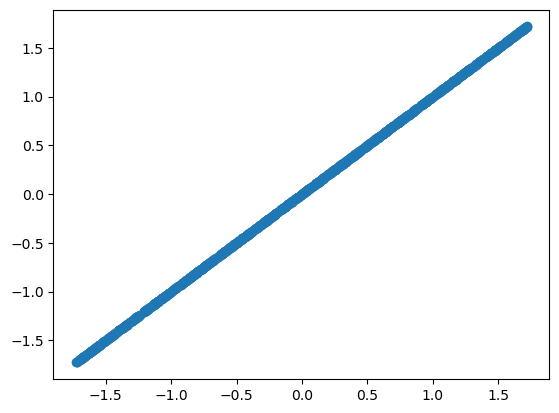

In [13]:
plt.scatter(x, y)

In [14]:
print(x.shape, y.shape, x[0], y[0])

(1100,) (1100,) -0.9753373693912226 -0.9753373693912226


In [15]:
def hypothesis(X, theta):
    y_ = theta[0] + theta[1]*X
    return y_

In [16]:
def cost(X, Y, theta):
    m = X.shape[0]
    
    total_loss = 0
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        total_loss+=(y_p - y_gt)**2
        
    return total_loss/m

In [17]:
def gradient(X, Y, theta):
    m = X.shape[0]
    
    grad = np.zeros((2,))
    
    for i in range(m):
        y_p = hypothesis(X[i], theta)
        
        y_gt = Y[i]
        
        grad[0] += (y_p - y_gt)*1
        grad[1] += (y_p - y_gt)*X[i]
        
    return grad/m

In [18]:
def gradient_descent(X, Y, learning_rate = 0.001, epochs = 100):
    
    theta = np.zeros((2,))
    cost_epoch = []
        
    for i in range(epochs):
        loss = cost(X, Y, theta)
        grad = gradient(X, Y, theta)
        cost_epoch.append(loss)
        
        theta[0] = theta[0] - learning_rate*grad[0]
        theta[1] = theta[1] - learning_rate*grad[1]
        
    return theta, cost_epoch

In [19]:
X_train = x[:1000]
Y_train = y[:1000]
X_test = x[1000:]
Y_test = y[1000:]

In [20]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(1000,) (100,) (1000,) (100,)


In [21]:
theta, cost_epoch = gradient_descent(X_train, Y_train, learning_rate=0.03)

In [22]:
theta

array([0.00171016, 0.95320585])

In [23]:
cost_epoch

[1.00540910543952,
 0.9456650685968181,
 0.8894716438822142,
 0.8366177894971665,
 0.7869050092003046,
 0.7401466064303002,
 0.6961669827793975,
 0.6548009781801355,
 0.6158932503246517,
 0.579297690983502,
 0.544876877029679,
 0.5125015541040268,
 0.48205015098099546,
 0.4534083228091047,
 0.4264685215090856,
 0.4011295917147636,
 0.37729639073780297,
 0.354879431127765,
 0.3337945444838801,
 0.31396256525484534,
 0.2953090333381161,
 0.27776391436082504,
 0.2612613365909686,
 0.24573934348998974,
 0.2311396609767271,
 0.2174074785279816,
 0.20449124329298604,
 0.19234246644797873,
 0.18091554106310406,
 0.17016757079713848,
 0.16005820877623908,
 0.15054950605121223,
 0.14160576906378114,
 0.13319342558622263,
 0.12528089863057576,
 0.11783848785359234,
 0.11083825801176919,
 0.10425393404730583,
 0.09806080241075314,
 0.09223561824956238,
 0.08675651811378235,
 0.0816029378509116,
 0.07675553538138287,
 0.07219611806453395,
 0.06790757438214626,
 0.06387380968287522,
 0.060079685746

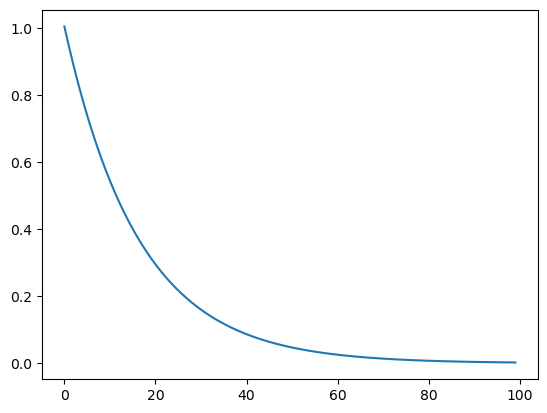

In [24]:
plt.plot(cost_epoch)

In [25]:
y_p = theta[0] + theta[1]*X_test

In [26]:
for i in range(len(y_p)):
    print(y_p[i], Y_test[i])

-1.0752531512886916 -1.1298328827052073
-0.7328793202659569 -0.770651462193649
-0.32687639883143005 -0.3447173140811068
1.2729572995580962 1.3336543612694334
-0.9850975412466724 -1.0352514131307167
1.5065532706125029 1.578717871113231
1.1200361603820472 1.1732261187503616
-1.3049437837106013 -1.370799335617379
-1.1068587941071222 -1.1629900888205047
0.5503612299244769 0.5755850836854296
0.7110215375728421 0.7441324208127579
-0.7604442693475254 -0.7995696115097662
1.5397669261334401 1.6135620294262523
1.1828123206724404 1.2390840447489972
0.9390601252394082 0.9833657278819766
-1.1921212354877704 -1.2524381775365816
-0.4812725342621086 -0.5066929623946124
0.34410169581407085 0.3591999930535804
0.01694386319179021 0.015981544664192777
-1.2200336185438188 -1.2817208168258807
1.0310051802286153 1.0798244886505348
-0.3830944715495745 -0.4036952072133198
0.36372390445741604 0.3797854821753319
1.1170097409745756 1.170051128364583
-1.052180424871153 -1.1056274852746548
-0.028631185058602248 -0.

In [27]:
def R2_score(y_t, y_p):
    num = np.sum((y_t - y_p)**2)
    den = np.sum((y_t - y_t.mean())**2)
    
    score = (1 - num/den)
    
    return score

In [28]:
R2_score(Y_test, y_p)

0.9977547643472148

In [40]:
# Examples of meshgrid

In [30]:
a = np.array([5,4,3,2,1])
b = np.array([30,60,80,90,10,30,50,10])

In [31]:
a, b = np.meshgrid(a, b)

In [32]:
print(a.shape, b.shape)

(8, 5) (8, 5)


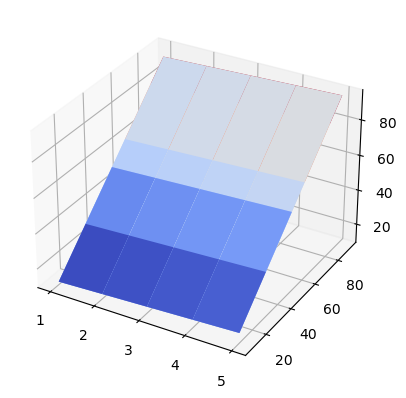

In [33]:
fig = plt.figure()
ax = fig.add_subplot(projection = '3d')
ax.plot_surface(a, b, a+b, cmap = 'coolwarm')
plt.show()

In [37]:
a = np.arange(-1, 1, 0.02)
b = a
a, b = np.meshgrid(a, b)

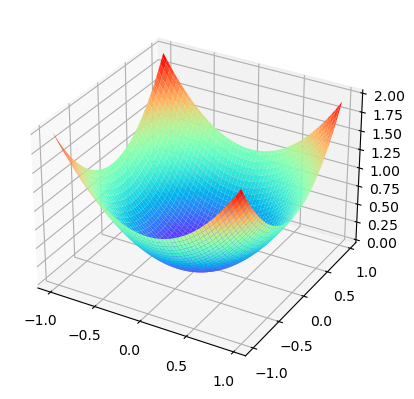

In [38]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.plot_surface(a, b, a**2+b**2, cmap = 'rainbow')
plt.show()

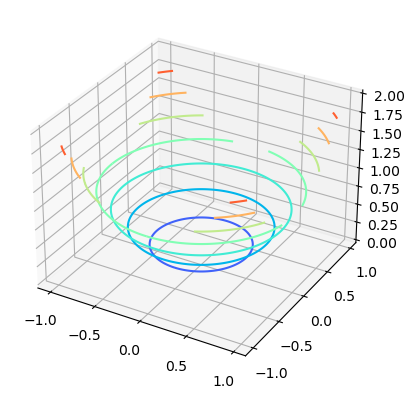

In [39]:
fig = plt.figure()
axes = fig.add_subplot(projection = '3d')
axes.contour(a, b, a**2+b**2, cmap = 'rainbow')
plt.show()

In [34]:
T0 = np.arange(-50, 50)
T1 = np.arange(-50, 50)
T0, T1 = np.meshgrid(T0, T1)
J = np.zeros(T0.shape)
for i in range(J.shape[0]):
    for j in range(J.shape[1]):
        y_pred = T0[i, j] + T1[i, j]*X_test
        J[i, j] = (np.sum((y_pred - Y_test)**2))/Y_test.shape[0]

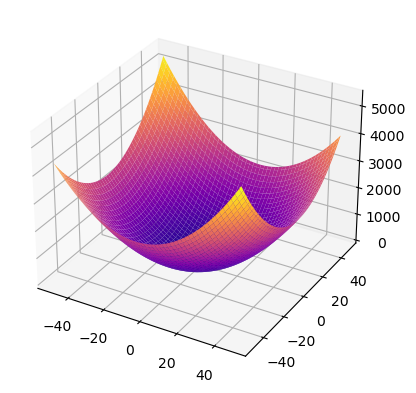

In [35]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(T0, T1, J, cmap = 'plasma')